In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
import numpy as np
from sklearn import metrics

In [2]:
df1 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Approximate_coefficients\cA-ble-combined-files.csv")
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.dropna(inplace=True)
df1.isnull().sum()
df1.drop(df1[df1['Labels'] == 'Labels'].index, inplace = True)
df1.drop("Labels",axis=1,inplace=True)
df2 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Approximate_coefficients\cA-dji-fly-combined-files.csv")
df2.drop('Unnamed: 0',axis=1,inplace=True)
df2.dropna(inplace=True)
df2.isnull().sum()
df2.drop(df2[df2['Labels'] == 'Labels'].index, inplace = True)
df2.drop("Labels",axis=1,inplace=True)
df3 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Approximate_coefficients\cA-dji-vid-combined-files.csv")
df3.drop('Unnamed: 0',axis=1,inplace=True)
df3.dropna(inplace=True)
df3.isnull().sum()
df3.drop(df3[df3['Labels'] == 'Labels'].index, inplace = True)
df3.drop("Labels",axis=1,inplace=True)
dfa = pd.concat([df1, df2,df3], axis=0, ignore_index=True)

C:\Users\student\AppData\Local\Temp\ipykernel_14012\364653728.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Approximate_coefficients\cA-ble-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14012\364653728.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Approximate_coefficients\cA-dji-fly-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14012\364653728.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Approximate_coefficients\cA-dji-vid-combined-files.csv")


In [3]:
df4 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Descriptive_coefficients\cD-ble-combined-files.csv")
df4.drop('Unnamed: 0',axis=1,inplace=True)
df4.dropna(inplace=True)
df4.isnull().sum()
df4.drop(df4[df4['Labels'] == 'Labels'].index, inplace = True)

df5 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Descriptive_coefficients\cD-dji-fly-combined-files.csv")
df5.drop('Unnamed: 0',axis=1,inplace=True)
df5.dropna(inplace=True)
df5.isnull().sum()
df5.drop(df5[df5['Labels'] == 'Labels'].index, inplace = True)

df6 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Descriptive_coefficients\cD-dji-vid-combined-files.csv")
df6.drop('Unnamed: 0',axis=1,inplace=True)
df6.dropna(inplace=True)
df6.isnull().sum()
df6.drop(df6[df6['Labels'] == 'Labels'].index, inplace = True)
dfb = pd.concat([df4, df5,df6], axis=0, ignore_index=True)

C:\Users\student\AppData\Local\Temp\ipykernel_14012\507689285.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_ble\Descriptive_coefficients\cD-ble-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14012\507689285.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_fly\Descriptive_coefficients\cD-dji-fly-combined-files.csv")
C:\Users\student\AppData\Local\Temp\ipykernel_14012\507689285.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv(r"C:\Users\student\Desktop\ccsv\stat_dji_vid\Descriptive_coefficients\cD-dji-vid-combined-files.csv")


In [4]:
df = pd.concat([dfa, dfb], axis=1, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.42204765250281806,0.002196437711138652,-0.010192647376830328,0.0035010063352879884,-0.010274861157190982,0.0030154483830886576,-0.021815466080122886,0.011064454428858792,0.03288525887956754,0.004304891550304923,...,-1.8316056845427267e-06,0.0015451040292182472,-1.8613878907954885e-05,0.001340199281372737,-0.006012282887269361,0.0019073609655378852,-0.02196003599027788,0.0019073600861080834,3.6380224980782356e-06,BLE-IPhone6S
1,-0.03768653533307109,0.005900599613821633,-0.010031562868760889,0.0038150919900910188,-0.010079415428657458,0.0031922802327142286,-0.02470061731085586,0.011123746873907693,0.023238327537483314,0.004806817130375256,...,9.158028422713633e-07,0.0016795520170059916,4.653469726988678e-05,0.0014053478575505787,-0.006384560465428455,0.0021135396160106112,-0.019858488238713414,0.002113539417600591,4.467048869751445e-06,BLE-IPhone6S
2,-0.41053378469502677,0.003815845176130709,-0.01016063895066021,0.0037122017462590533,-0.010163177883743255,0.0033132704456159327,-0.024086359306893353,0.011135143772678081,-0.062421261440778836,0.004555528833465773,...,7.371096047549982e-07,0.0016352328001899214,0.0,0.0014332686759125101,-0.006812679680311413,0.0020122099693063744,-0.00656864322334498,0.0020122098342979498,4.048988417245382e-06,BLE-IPhone6S
3,-0.540285457367073,0.0029782206252727487,-0.010156305639650438,0.003953902540971516,-0.0101445640048353,0.0035552508714193423,-0.02442140912723654,0.011244800528609548,-0.0049853428150490806,0.004826488856531453,...,-8.190106719499283e-08,0.0017778710078695493,-1.861387890795467e-05,0.0015728727677221705,-0.006272877191980728,0.00216064996271806,0.02661407824791601,0.002160649961165803,4.6684082546857855e-06,BLE-IPhone6S
4,-0.13947545639468562,0.0029782206252727487,-0.01012554062059137,0.00341543675549119,-0.010163177883743255,0.0028758442912789972,-0.023137051482587663,0.011000367075389893,0.03506742821964078,0.004299011855540309,...,-1.9879622673695697e-06,0.0015277282204499833,9.306939453977009e-06,0.001275050705194894,-0.005733074703650041,0.0019243521353933463,0.02514221223982336,0.0019243511085555464,3.7031271889989607e-06,BLE-IPhone6S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,-1.580033529698243,0.2859091800261839,-0.00482820193107342,0.2010356901581723,0.005118816699687528,0.22011842502601806,-0.3046719699654022,0.21935988250867566,-0.028188399861477132,0.21930674070883646,...,2.7131589896234936e-05,0.0717440447929487,0.0,0.07549789285066419,-0.1531177678968352,0.09072060145710933,0.03059691203403007,0.09072059740002011,0.008230226792616537,DJI-INSPIRE-VIDEOING
699996,-1.5732519228583344,0.2859091800261839,-0.008140452336125198,0.19875643022215567,-0.007482779320997782,0.21958792947714134,-0.3046719699654022,0.21770953056754086,-0.007857379224396702,0.21755728610116065,...,-4.09133058396844e-05,0.0717004871488416,0.0,0.0758608634893693,-0.14807340671277947,0.08938424143248361,0.022667593885058106,0.08938423206898387,0.007989540942561964,DJI-INSPIRE-VIDEOING
699997,-1.532651227797683,0.2859091800261839,-0.005443137480228173,0.19548249652555277,0.0027269332600153642,0.2108114855720407,-0.3046719699654022,0.21505195212358802,-0.02324485939261929,0.21498305599869327,...,3.3467754276502324e-05,0.06976368415972886,0.0,0.06621887421504877,-0.1522429155881613,0.08898218869997132,0.03308924083751441,0.08898218240606759,0.007917828785746685,DJI-INSPIRE-VIDEOING
699998,-1.5682506771110056,0.2859091800261839,-0.006284693282311494,0.1988710955164382,0.0008562384297659195,0.2166097088518686,-0.3046719699654022,0.21739288362928408,-0.018548067159849295,0.21730202135047613,...,-9.705276462607581e-05,0.0712366793503441,0.0,0.07374818823331644,-0.15174034085764657,0.0897428662602625,0.02835897299347792,0.08974281378120576,0.008053772625368173,DJI-INSPIRE-VIDEOING


In [5]:
df=df.rename(columns={22:'Labels'})

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [6]:
df['Labels'].unique()

array(['BLE-IPhone6S', 'DJI-INSPIRE-FLYING', 'DJI-INSPIRE-VIDEOING'],
      dtype=object)

In [7]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Labels']= label_encoder.fit_transform(df['Labels'])
df['Labels'].unique()

array([0, 1, 2])

In [8]:
y = df['Labels']
X = df.drop(['Labels'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_train

array([[ 1.54085608,  0.2112677 , -0.52398354, ...,  0.16944468,
        -0.28386175, -0.65781933],
       [-0.42718898,  0.46369975, -0.34254909, ...,  0.02969029,
         0.10309359, -0.28893707],
       [-0.32388287,  1.01185978,  0.0220402 , ...,  0.21094421,
         0.75510777,  0.60284059],
       ...,
       [-0.90420297,  0.55809404, -0.35948765, ...,  0.32313391,
         0.65048959,  0.43690806],
       [-0.72386296,  1.01185978, -0.00761309, ...,  0.22054525,
         0.93683637,  0.91183338],
       [-0.90219394,  0.70312773, -0.36932275, ...,  0.27710821,
         0.75128722,  0.5966273 ]])

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560000, 22)
(140000, 22)
(560000,)
(140000,)


In [12]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy')

In [13]:
y_pred= classifier.predict(X_test) 

In [14]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)  

0.9562428571428572

In [15]:
from sklearn.metrics import confusion_matrix 
confusion_matrix (y_test, y_pred)  

array([[69544,   430,    54],
       [ 1268, 32807,  1070],
       [ 1323,  1981, 31523]], dtype=int64)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=64)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_predict)

0.9187714285714286

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn_predict)

array([[69567,   117,   344],
       [ 4322, 29030,  1793],
       [ 2436,  2360, 30031]], dtype=int64)

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
svm_predict = svm_model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_predict)

0.9285357142857142

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_predict)

array([[69442,   276,   310],
       [ 4321, 29888,   936],
       [ 2691,  1471, 30665]], dtype=int64)

In [22]:
svm_modell = SVC(kernel='linear')
svm_modell.fit(X_train,y_train)
svm_predictl = svm_modell.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_predictl)

0.9232428571428571

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_predictl)

array([[69307,   634,    87],
       [ 4162, 30700,   283],
       [ 2457,  3123, 29247]], dtype=int64)

In [26]:
test_error_rates=[]
for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)

  y_pred_test = knn_model.predict(X_test)

  test_error = 1 - accuracy_score(y_test, y_pred_test)
  test_error_rates.append(test_error)

Text(0.5, 0, 'K value')

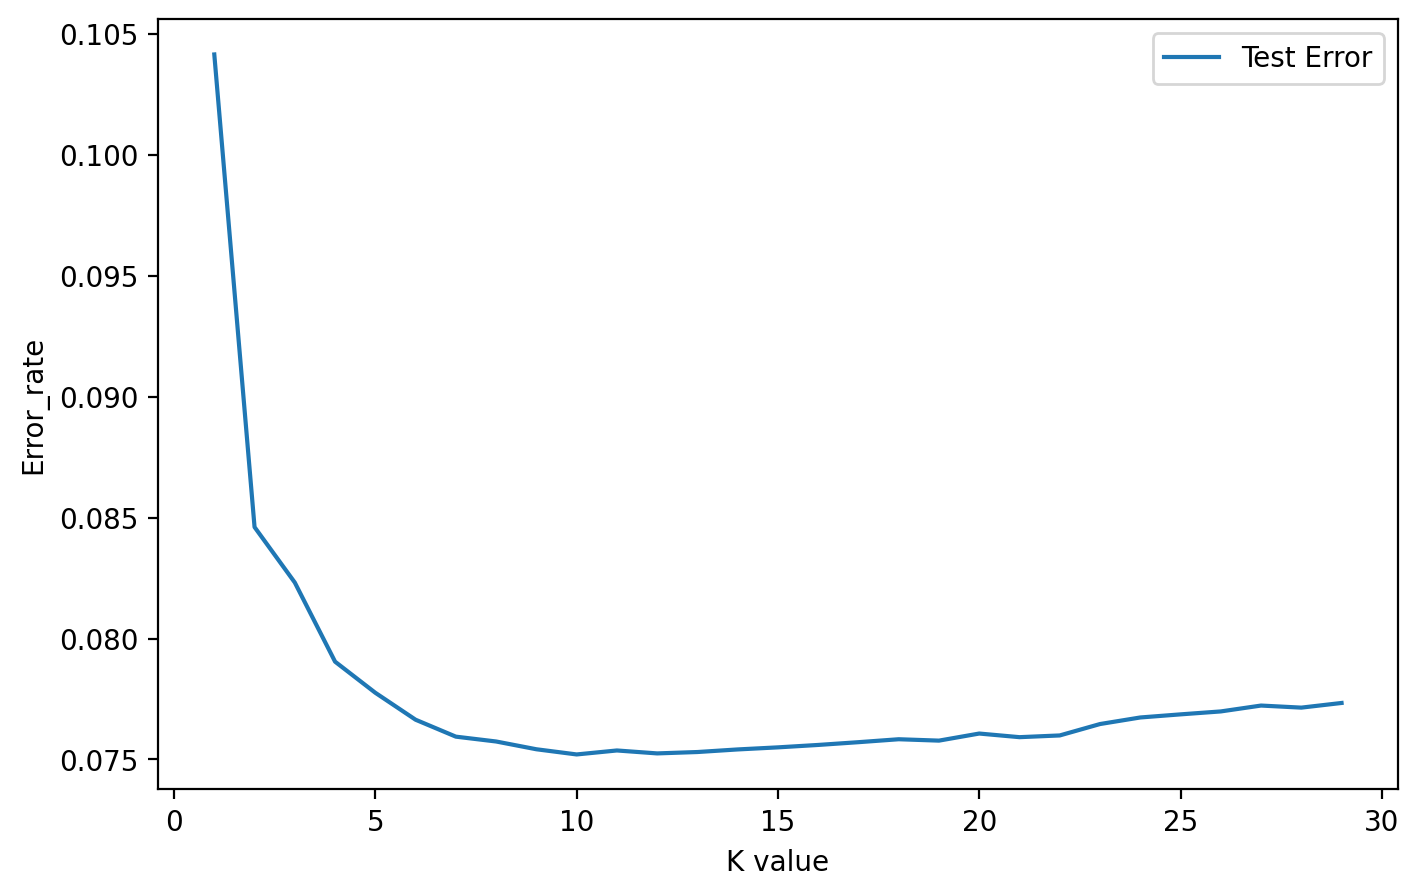

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi=200)
plt.plot(range(1,30),test_error_rates, label='Test Error')
plt.legend()
plt.ylabel('Error_rate')
plt.xlabel('K value')